# Analysis of Oscar Award Winning Movies

## Overview

We are aiming to conduct analyses on American films that have received recognition in the Oscars and Golden Globes. We would like to explore what categorizes a critically acclaimed/Oscar winning film through analysis of a winning film’s directing, ensemble, and audience reception. In response to popular opinions that award shows often nominate films that are not necessarily box-office hits (but rather lauded as high culture), we plan to analyze the correlation between beloved films rated by the public and award winning movies. We are interested in answering questions such as: Is there a difference between films that win Oscars and films that win Golden Globes? Do award winning films favor a certain demographic range for casting? What genres frequent award show nominations the most? Is there a veritable difference between female and male representation in acclaimed movies and if so do they conform to certain stereotypical roles? Are award winning movies only focused on a collection of niche topical themes? In engaging with this study, we hope to better understand how art is judged and the consequences of award nominations/wins on film viewership.

In terms of data sources, we plan to gather basic information about all the movies we are studying from iMDB. This will include factors such as cast, genre, release date, directors, and writers. We will also consolidate this data with critics’ and audience reviews and ratings from Rotten Tomatoes. This will give us a holistic picture of the basic characteristics of the movie, as well as its reception with the general public and at awards shows. We are also planning to analyze the scripts of these movies, as found on iMDB, for more qualitative and subtle characteristics, such as the number and content of lines of characters based on their key demographic information. One such quality we will observe for movies is whether they pass the Bechdel Test, a popular metric for determining the significance of female characters in the film. The collection of this data will require using iMDB’s API, as well as web scraping and preprocessing the text from film script files. Towards the end of the project, we hope to employ machine learning to add a predictive element to our analyses, extrapolating our findings to predict the strength of a particular film’s reception. 

## Data Collection



The universal IMDb movie id was used to identify films from varying sources. 
Example: Contagion (2011), IMDb id: tt1598778, IMDb url: www.imdb.com/title/tt1598778/

The Oscars film nominations data was collected from a pre-exisiting data set on iMDb (BestPictureAcademyAwards.csv). Information on actors and their demographics was collected from a pre-exisiting data set on iMDb (Top1000Actors.csv). The Oscars data came with films' iMDb movie ids. The Golden Globes film nominations data was collected from a pre-existing dataset on Kaggle (GoldenGlobesDataRaw.csv). The films listed in this data set did not come with their unique iMDb ids, so a webscrape of iMDB was conducted to extract the ids for the relevant films. Conflicts were checked and resolved manually. (See **GoldenGlobesCleaning.py** and **GoldenGlobesScrape.py**). 

Once the nominated film for each id was collected, The Movie Database API (which collects information from iMDb) was used to collect all details about films. (See **movie_analysis.py**.) Sample API calls included:
*  
*  

Finally, https://bechdeltest.com/ was scraped to collect the scores of films on the Bechdel test. 

All of this data was consolidated into one dataframe which is constructed in a cell below. 


## Data Format

**Movie DataFrame** 
<p> 


| Fields       | Description                                |
|--------------|--------------------------------------------|
| ID           | unique IMDb id                             |
| Title        | Movie title                                |
| Cast         | List of tuples (actor name, rank in movie) |
| Budget       | Movie budget                               |
| Keywords     | List                                       |
| Bechdel Pass | T/F                                        |
| IMDb Rating  |                                            |
| Runtime      |                                            |
| Year         | Year of Release                            |
| Genres       |                                            |
| Num Votes    |                                            |
| Release Date | Full release date                          |
| Directors    |                                            |
| Award Year   | Year of Award Nom. (1yr after release)     |
| Oscar Winner | 1: won, 0: nominated, NaN: not nominated   |
| Golden Globes Winner | 1: won, 0: nominated, NaN: not nominated   |


</p>

**Actor DataFrame** 

| Fields     |                                              |
|------------|----------------------------------------------|
| Actor name |                                              |
| Gender     | 1 for female, 2 for male, 0 for undocumented |


## Descriptive Statistics

Running the following cell will construct all dataframes required. 

## Data Analysis, Visualizations, and Insights

In [1]:
import pandas as pd
from movie_analysis import MovieAnalyzer

## get dataframes
result = MovieAnalyzer().make_dataframes()
movies = result[0]
actors = result[1]


In [6]:
actors.head()

,Name,Gender
0,Viggo Mortensen,2
1,Mahershala Ali,2
2,Linda Cardellini,1
3,Dimiter D. Marinov,2
4,Mike Hatton,0


In [2]:
movies.head()

,Title,Cast,Budget,Keywords,Genres,Release Date,Runtime,Bechdel Pass,IMDb Rating,Num Votes,Directors,Oscar Winner,Golden Globes Winner,Year,Award Year
ID,,,,,,,,,,,,,,,
tt0031210,Dark Victory,"[(Bette Davis, 1), (George Brent, 2), (Humphre...",0.0,[brain tumor],"[Drama, Romance]",1939-04-20,104.0,True,7.5,9421.0,Edmund Goulding,0.0,NaN,1939.0,1940.0
tt0031381,Gone with the Wind,"[(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...",4000000.0,"[southern usa, loss of loved one, marriage pro...","[Drama, Romance, War]",1939-12-15,233.0,True,8.1,274948.0,"Sam Wood, George Cukor, Victor Fleming",1.0,NaN,1939.0,1940.0
tt0031385,"Goodbye, Mr. Chips","[(Robert Donat, 1), (Greer Garson, 2), (Terry ...",0.0,"[world war i, teacher, school, schoolteacher, ...","[Drama, Romance]",1939-07-28,114.0,False,7.9,9336.0,"Sam Wood, Sidney Franklin",0.0,NaN,1939.0,1940.0
tt0031593,Love Affair,"[(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...",0.0,"[artist, madeira, orphanage, playboy, love, si...","[Drama, Romance]",1939-04-07,88.0,NaN,7.3,4081.0,Leo McCarey,0.0,NaN,1939.0,1940.0
tt0031679,Mr. Smith Goes to Washington,"[(James Stewart, 9), (Jean Arthur, 8), (Claude...",1500000.0,"[washington d.c., senate, senator, sightseeing...","[Comedy, Drama]",1939-10-19,129.0,False,8.1,101886.0,Frank Capra,0.0,NaN,1939.0,1940.0


### Some Preliminary Graphs... 

In [ ]:
conda install -c conda-forge wordcloud=1.6.0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from wordcloud import WordCloud, STOPWORDS

C:\Users\Amy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Analyzing Gender Over Time:

In [4]:
#movies['no_of_females'] = movies.apply(lambda  row: [item[2] == "F" for item in row['Cast']]), axis=1)

#function that iterates through cast list and counts females
def count_females(cast_list):
    female_count = 0
    for item in cast_list: 
        act_ser = actors[actors['Name']==item[0]]
        if act_ser["Gender"].tolist()[0] == 1:
            female_count += 1
    return female_count
#get number of female cast members per movie
movies['no_of_females'] = movies.apply(lambda row: count_females(row['Cast']),axis=1)
movies

,Title,Cast,Budget,Keywords,Genres,Release Date,Runtime,Bechdel Pass,IMDb Rating,Num Votes,Directors,Oscar Winner,Golden Globes Winner,Year,Award Year,no_of_females
ID,,,,,,,,,,,,,,,,
tt0031210,Dark Victory,"[(Bette Davis, 1), (George Brent, 2), (Humphre...",0.0,[brain tumor],"[Drama, Romance]",1939-04-20,104.0,True,7.5,9421.0,Edmund Goulding,0.0,NaN,1939.0,1940.0,11
tt0031381,Gone with the Wind,"[(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...",4000000.0,"[southern usa, loss of loved one, marriage pro...","[Drama, Romance, War]",1939-12-15,233.0,True,8.1,274948.0,"Sam Wood, George Cukor, Victor Fleming",1.0,NaN,1939.0,1940.0,22
tt0031385,"Goodbye, Mr. Chips","[(Robert Donat, 1), (Greer Garson, 2), (Terry ...",0.0,"[world war i, teacher, school, schoolteacher, ...","[Drama, Romance]",1939-07-28,114.0,False,7.9,9336.0,"Sam Wood, Sidney Franklin",0.0,NaN,1939.0,1940.0,5
tt0031593,Love Affair,"[(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...",0.0,"[artist, madeira, orphanage, playboy, love, si...","[Drama, Romance]",1939-04-07,88.0,NaN,7.3,4081.0,Leo McCarey,0.0,NaN,1939.0,1940.0,9
tt0031679,Mr. Smith Goes to Washington,"[(James Stewart, 9), (Jean Arthur, 8), (Claude...",1500000.0,"[washington d.c., senate, senator, sightseeing...","[Comedy, Drama]",1939-10-19,129.0,False,8.1,101886.0,Frank Capra,0.0,NaN,1939.0,1940.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7286456,Joker,"[(Joaquin Phoenix, 357), (Robert De Niro, 16),...",55000000.0,"[street gang, dc comics, clown, villain, socie...","[Crime, Thriller, Drama]",2019-10-02,122.0,True,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0,16
tt7349662,BlacKkKlansman,"[(John David Washington, 11), (Adam Driver, 6)...",15000000.0,"[ku klux klan, based on novel or book, biograp...","[Crime, Drama, History]",2018-07-30,135.0,True,7.5,182306.0,Spike Lee,0.0,0.0,2018.0,2019.0,3
tt7653254,Marriage Story,"[(Adam Driver, 3), (Scarlett Johansson, 2), (L...",19000000.0,"[new york city, parent child relationship, the...",[Drama],2019-11-06,137.0,False,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0,18


#### Brief Explanation of the Bechdel Test for Films:

The Bechdel Test is a rudimentary method to evaluate the representation of women in film. The three criteria a film must fulfill in order to pass the Bechdel Test are: 
1. The film must have at least two women in it
2. Two women must talk to each other
3. The two women must speak to each other about something other than a man

While these are not very demanding criteria, they serve as a potential baseline for measuring the involvement and representation of women in films, especially given that many films do not pass this test.

#### Analyzing Topics of Films In Relation to Bechdel Scores:

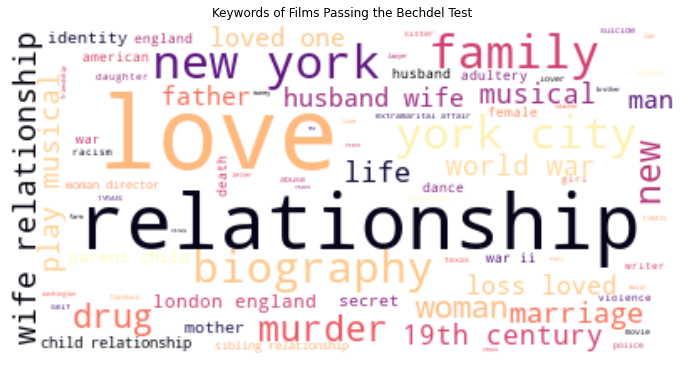

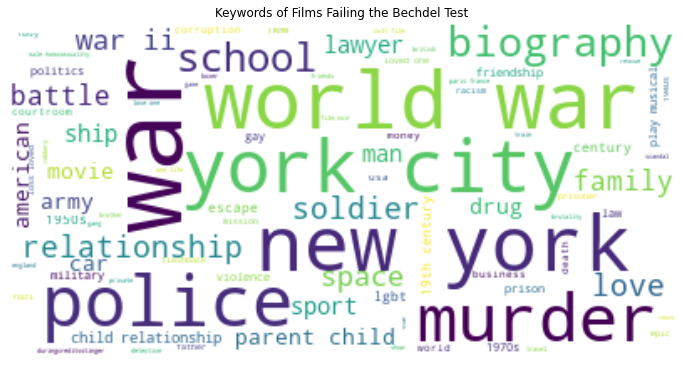

<Figure size 864x648 with 0 Axes>

In [5]:
stopwords = set(STOPWORDS)
stopwords.update(['based', 'novel', 'book', 'story', 'true'])

# creates wordclouds of the keywords of films that pass the bechdel test and of films that don't
def bechdel_keywords_cloud(df):
    # divide full movie data into two data frames, one for films that pass the bechdel test, one for those that fail
    # films with no bechdel scores are not included
    bechdel_pass = df[df['Bechdel Pass'] == True] # all the films that pass the Bechdel test
    bechdel_fail = df[df['Bechdel Pass'] == False] # all the films that fail the Bechdel test)
    
    pass_keywords = []
    for row in bechdel_pass['Keywords']:
        for word in row:
            pass_keywords.append(word)
    pass_text = " ".join(pass_keywords)

    # generate a word cloud of keywords of all films that pass the Bechdel Test
    pass_keyword_cloud = WordCloud(stopwords=stopwords, max_font_size=60, relative_scaling=1, max_words=400, background_color="white", colormap='magma').generate(pass_text)
    plt.imshow(pass_keyword_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Keywords of Films Passing the Bechdel Test")
    plt.figure()

    fail_keywords = []
    for row in bechdel_fail['Keywords']:
        for word in row:
            fail_keywords.append(word)
    fail_text = " ".join(fail_keywords)

    # generate a word cloud of keywords of all films that fail the Bechdel Test
    fail_keyword_cloud = WordCloud(stopwords=stopwords, max_font_size=60, max_words=400, background_color="white", relative_scaling=1).generate(fail_text)
    plt.imshow(fail_keyword_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Keywords of Films Failing the Bechdel Test")
    plt.figure()

    plt.show()

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
bechdel_keywords_cloud(movies)


Analysis:

The sizes of the words in wordclouds are directly proportional to their relative frequency. Based on the wordclouds of film keywords above, there are key themes of the words appearing with greater frequency in films that pass the Bechdel Test and in films that do not. 

In films passing the Bechdel test, many keywords seem to be associated with family and relationships, for instance: 'love', 'husband', 'wife', 'marriage'.

In films failing the Bechdel test, many keywords seem to be associated with violence and careers, for instance: 'war', 'murder', 'battle', 'school', 'sport', 'police'. 

Interestingly, LGBT terms appear with greater relative frequency in these movies than in movies passing the Bechdel Test. 'Love' and 'relationship' are significantly more frequent keywords for films passing the test than for films that do not. 

Given that women have a more significant presence in films that pass the Bechdel Test than in films that do not, these findings align with the stereotypes associating women more strongly with relationships and familial roles, rather than academic and career pursuits, war, and violence.

This suggests that even if the women are present in films in a somewhat significant way (as given by the criteria of the Bechdel Test), they are often still presented in a stereotypical manner, associated with a limited range of aspects of life. 


#### Analyzing Film Genres in Relation to Bechdel Scores:

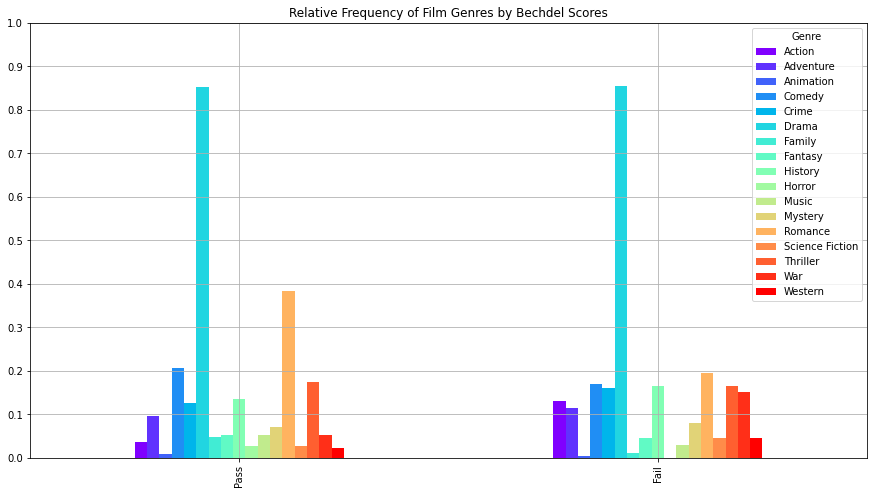

In [6]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)

#creates a plot comparing the frequency of each genre of films that pass the test vs. of films that do not pass the test
def bechdel_genre_graph(df):
    # divides full movie data into two data frames, one for films that pass the bechdel test, one for those that fail
    # films with no bechdel scores are not included
    bechdel_pass = df[df['Bechdel Pass'] == True ] # all the films that pass the Bechdel test
    bechdel_fail = df[df['Bechdel Pass'] == False ] # all the films that fail the Bechdel test
    
    pass_count = len(bechdel_pass)
    fail_count = len(bechdel_fail)

    pass_genres = []
    for row in bechdel_pass['Genres']:
        for word in row:
            pass_genres.append(word)
        
    pass_rel = (pd.DataFrame(pass_genres, columns = ['Pass'])['Pass'].value_counts() / pass_count).to_frame()
    
    fail_genres = []    
    for row in bechdel_fail['Genres']:
        for word in row:
            fail_genres.append(word)

    
    fail_rel = (pd.DataFrame(fail_genres, columns = ['Fail'])['Fail'].value_counts() / fail_count).to_frame()
  
    # genre relative frequency plot
    df_rel = pd.merge(pass_rel,fail_rel,how='outer', left_index = True, right_index = True)
    df_rel = df_rel.fillna(0)
    df_rel.index.name = 'Genre'
    df_rel = df_rel.T
    yticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    df_rel.plot(kind='bar', title='Relative Frequency of Film Genres by Bechdel Scores', grid=True, colormap = 'rainbow', yticks=yticks)

bechdel_genre_graph(movies)



In [11]:
# splits list of genres for each film into individual records
def split_genres(df):
    
    film = []
    genre = []
    score = []
    for row in df.iterrows():
        title = row[1]['Title']
        test = row[1]['Bechdel Pass']
        if test == True:
            test = 'Pass'
        elif test == False:
            test = 'Fail'
        else:
            continue
        genre_list = row[1]['Genres']
        for g in genre_list:
            film.append(title)
            score.append(test)
            genre.append(g)
    return pd.DataFrame(zip(film,score,genre), columns=['Film','Score','Genre'])


#creates a plot comparing the frequency of each genre of films that pass the test vs. of films that do not pass the test
def bechdel_genre_graph2(df):
    genres = split_genres(df)
    a = alt.Chart(genres).mark_bar().encode(
        x = alt.X('count(Film)', stack='normalize'),
        y = 'Genre',
        color = 'Score'
    ).properties(height=400, width=400, title = 'Relative Frequency of Bechdel Scores by Film Genre' )
    return a
    
bechdel_genre_graph2(movies) 

alt.Chart(...)

Analysis:

This first graph depicts the proportion of films that were tagged as each genre, separated by their score on the Bechdel Test. For instance, over 90% of Oscar-nominated and Golden Globes-nominated films failing the Bechdel Test were tagged as 'Drama'. The second graph depicts the proportions, within a given genre, of films passing and failing the Bechdel Test.

Key insights from these graphs include:
* Only approximately 20% of films failing the Bechdel Test were tagged as 'Romance,' but nearly 40% of films passing the Bechdel Test had this tag. Based on the second graph, around 68% percent of films tagged as 'Romance' passed the Bechdel test. This reinforces the idea that romantic themes are more heavily associated with the presence of women. 
* Based on the first graph, while the 'Sport' genre has a relatively low presence among nominated films, of the films that were tagged as 'Sport' films, about 90% did not pass the Bechdel Test. This suggests that women may have very little representation in sports films. 
* Similarly, 'War' films have a significant presence among Oscar-nominated films, but over 70% of the 'War' films did not pass the Bechdel Test. As suggested by the wordclouds above as well, women may also lack representation in films associated with topics of war. 
* Based on the second graph, the film genres with notably large proportions of films not passing the Bechdel Test are: Action, Film Noir, War, Western, and Sport. All of these categories are stereotypically not societally associated with women, and these results show that the same may hold true in film, even internationally recognized films.


## Future Plans

In addition to the analyses conducted here, we plan to incorporate actors' ethicity data into our analysis. With this data, we will look for interest correlations in the representation of certain actors and races in films with other characteristics of films, suggesting potential patterns of diversity in film. Furthermore, we plan to more actively incorporate public reception, primarily through online ratings (such as those on Rotten Tomatoes or iMDB), to find relationships between diversity and other characteristics of films with the general public's opinion. We plan to incorporate machine learning using this data of nominated films and data of other films that were not nominated to predict the reception and potential for nomination for new films. 

## Sources and Acknowledgements 

1. **Pre-existing data sets from IMDb (i.e. BestPictureAcademyAwards.csv, Top1000Actors.csv)**
2. **Pre-existing Golden Globes dataset from Kaggle:** https://www.kaggle.com/unanimad/golden-globe-awards
3. **The Movie Database API (information collected from IMDb):** 
https://developers.themoviedb.org/3/getting-started/introduction 
4. **Webscraping for Bechdel Rankings from:** https://bechdeltest.com/. </p>
